# Cell line A549

# Imports data structuring




In [25]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#organizando os arquivos de forma aleatória
import random
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg
# Math
from math import ceil


# CNN template import

In [26]:
#modelo de revisão redes neurais - cnn
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
#from keras.utils import to_categorical
from util import meus_uteis, timeProcess, mask_corr_graphic, printLis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Documents from different files will be stored in this directory

In [27]:
diretorio = './../../results/results_A549' #alimentando a variável com os arquivos da pasta datasets
lista_dados = os.listdir(diretorio) #listando os arquivos dessa pasta
printLis(lista_dados) #printando as diferentes listas

-------------
-=< Lista >=-
-------------
0 -> 10_images_de_X_test_a549_melhor_modelo_18_PACIENCE_500_2022-6-29.gz
1 -> 11_images_de_y_test_a549_melhor_modelo_18_PACIENCE%00_2022-6-29.gz
2 -> 12_lista_img_camp_clar_100_resized_regressao_A549_samehuh72021-10-25.gz
3 -> 13_lista_rotulo_camp_clar_100_resized_regressao_A549_samehuh72021-10-25.gz
4 -> 14_model__A549_regressao_maior_erro_18_PACIEN_500_2022-6-29.h5
5 -> 15_images_de_X_test_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz
6 -> 16_images_de_y_test_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz
7 -> 1_lista_img_camp_clar_100_resized_regressao_A5492021-11-9.gz
8 -> 2_lista_img_camp_clar_75_resized_regressao_A5492021-11-9.gz
9 -> 3_lista_img_camp_clar_50_resized_regressao_A5492021-11-9.gz
10 -> 4_lista_img_camp_clar_25_resized_regressao_A5492021-11-9.gz
11 -> 5_lista_rotulo_camp_clar_100_resized_regressao_A5492021-11-9.gz
12 -> 6_lista_rotulo_camp_clar_75_resized_regressao_A5492021-11-9.gz
13 -> 7_lista_rotulo_camp_clar_50_resized_reg

Lists of all images in each file

In [28]:
#lstando arquivos com as imagens 100%, 75%, 50%, 25%
for k, v in enumerate(lista_dados): #percorra na lista_dados e retorne a chave e valor
    if k in [7,8,9,10]:  #atualizar        #Se a chave (k) for 12,14,16,17, print a chave e o valor  
        print(f'{k} -> {v}')

7 -> 1_lista_img_camp_clar_100_resized_regressao_A5492021-11-9.gz
8 -> 2_lista_img_camp_clar_75_resized_regressao_A5492021-11-9.gz
9 -> 3_lista_img_camp_clar_50_resized_regressao_A5492021-11-9.gz
10 -> 4_lista_img_camp_clar_25_resized_regressao_A5492021-11-9.gz


## x = features/images




In [29]:
#somando todas as imagens de diferentes tamanho
X_cem = joblib.load(diretorio+ '/' + lista_dados[7]) # carregar o arquivo que esta no diretorio e lista de dados na posição 12

X_setcin = joblib.load(diretorio+ '/' + lista_dados[8]) # carregar o arquivo que esta no diretorio e lista de dados na posição 14

X_cinq = joblib.load(diretorio+ '/' + lista_dados[9]) # carregar o arquivo que esta no diretorio e lista de dados na posição 16

X_vincin = joblib.load(diretorio+ '/' + lista_dados[10]) # carregar o arquivo que esta no diretorio e lista de dados na posição 18

x = np.asarray(list(X_cem) + list(X_setcin) + list(X_cinq) + list(X_vincin)) #somando os valores de cada lista

x.shape #Retornando a soma das imagens

(1136, 200, 200, 3)

## y = labels

Abrindo os rótulos que foram salvos na preparação das imagens

In [30]:
for k, v in enumerate(lista_dados):
    if k in [11,12,13,14]: #atualizar
        print(f'{k} -> {v}')

11 -> 5_lista_rotulo_camp_clar_100_resized_regressao_A5492021-11-9.gz
12 -> 6_lista_rotulo_camp_clar_75_resized_regressao_A5492021-11-9.gz
13 -> 7_lista_rotulo_camp_clar_50_resized_regressao_A5492021-11-9.gz
14 -> 8_lista_rotulo_camp_clar_25_resized_regressao_A5492021-11-9.gz


In [31]:
#somando todos os rótulos de diferentes tamanho
y_cem = joblib.load(diretorio+ '/' + lista_dados[11])

y_setcin = joblib.load(diretorio+ '/' + lista_dados[12])

y_cinq = joblib.load(diretorio+ '/' + lista_dados[13])

y_vincin = joblib.load(diretorio+ '/' + lista_dados[14])

y = np.asarray(list(y_cem) + list(y_setcin) + list(y_cinq) + list(y_vincin))

y.shape

(1136,)

In [ ]:
#Train and test split datasets for CNN model
#função que separa as imagens em teste e treino
from sklearn.model_selection import train_test_split

Test and training separation from a library.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#variáveis recebem o número de imagens para tes e treino
print(f'{X_train.shape} \n{X_test.shape} \n{y_train.shape} \n{y_test.shape}')

(795, 200, 200, 3) 
(341, 200, 200, 3) 
(795,) 
(341,)


In [ ]:
#data = timeProcess()[1]

In [ ]:
#joblib.dump(X_train, '/content/drive/MyDrive/1_Informações_scripts//images_de_X_train_a549_melhor_modelo_18_PACIENCE_500_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//images_de_X_train_a549_melhor_modelo_18_PACIENCE_500_2022-6-29.gz']

In [ ]:
#joblib.dump(y_train, '/content/drive/MyDrive/1_Informações_scripts//images_de_y_train_a549_melhor_modelo_18_PACIENCE_500_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//images_de_y_train_a549_melhor_modelo_18_PACIENCE_500_2022-6-29.gz']

In [ ]:
#joblib.dump(X_test, '/content/drive/MyDrive/1_Informações_scripts//images_de_X_test_a549_melhor_modelo_18_PACIENCE_500_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//images_de_X_test_a549_melhor_modelo_18_PACIENCE_500_2022-6-29.gz']

In [ ]:
#joblib.dump(y_test, '/content/drive/MyDrive/1_Informações_scripts//images_de_y_test_a549_melhor_modelo_18_PACIENCE%00_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//images_de_y_test_a549_melhor_modelo_18_PACIENCE%00_2022-6-29.gz']

### Model determination

In [ ]:
modelo = Sequential()
modelo.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
#função de ativação relu é muito utilizado para problemas de regressão
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(64, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(128, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(256, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Flatten())
modelo.add(Dropout(0.9))
modelo.add(Dense(1, activation='linear'))
#apenas uma saída e de forma linear
#modelo.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])
modelo.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])

print(modelo.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 128)     

# Training and testing epochs

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=18)

#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fit model
history = modelo.fit(X_train,y_train,
                    validation_data=(X_test, y_test), 
                    epochs=500, verbose=2, 
                    callbacks=[es]
                     )

Epoch 1/500
25/25 - 2s - loss: 180734.2656 - mean_squared_error: 180734.2656 - val_loss: 173601.1562 - val_mean_squared_error: 173601.1562 - 2s/epoch - 81ms/step
Epoch 2/500
25/25 - 1s - loss: 115703.1484 - mean_squared_error: 115703.1484 - val_loss: 97112.5156 - val_mean_squared_error: 97112.5156 - 1s/epoch - 47ms/step
Epoch 3/500
25/25 - 1s - loss: 95558.0781 - mean_squared_error: 95558.0781 - val_loss: 74364.7422 - val_mean_squared_error: 74364.7422 - 1s/epoch - 52ms/step
Epoch 4/500
25/25 - 1s - loss: 73058.0938 - mean_squared_error: 73058.0938 - val_loss: 91636.0156 - val_mean_squared_error: 91636.0156 - 1s/epoch - 47ms/step
Epoch 5/500
25/25 - 1s - loss: 76926.9766 - mean_squared_error: 76926.9766 - val_loss: 45905.9258 - val_mean_squared_error: 45905.9258 - 1s/epoch - 47ms/step
Epoch 6/500
25/25 - 1s - loss: 73226.7344 - mean_squared_error: 73226.7344 - val_loss: 69036.4375 - val_mean_squared_error: 69036.4375 - 1s/epoch - 47ms/step
Epoch 7/500
25/25 - 1s - loss: 55083.6914 - me

In [ ]:
#modelo.save('/content/drive/MyDrive/1_Informações_scripts//model__A549_regressao_menor_erro_Mean_squared_error_30%_18_PACIENCE'+data+'.h5')

## Accuracy Assessment

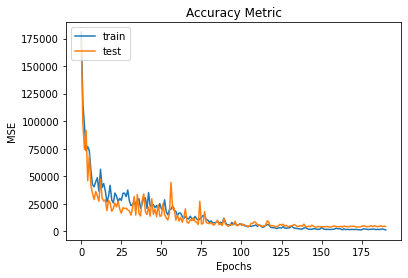

In [ ]:
#gráfico avaliando a acurácia a partir de treino e teste
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Accuracy Metric')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

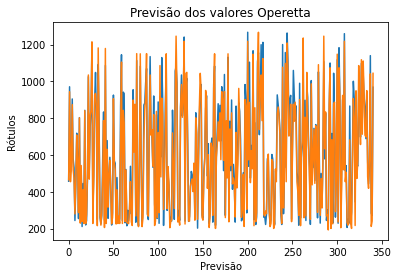

In [ ]:
#avaliando a previsão do modelo com os rótulos
prev = modelo.predict(X_test)
plt.title('Previsão dos valores Operetta')
plt.ylabel('Rótulos')
plt.xlabel('Previsão')

plt.plot(prev)
plt.plot(y_test)
plt.show()

# # Qualit model analisys

In [ ]:

from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error

In [ ]:
#buscando pelas métricas
print(f"{round(r2_score(y_test, prev) * 100, 2)}% r2_score") #raíz quadrada
print(f"{round(mean_absolute_error(y_test, prev), 2)} Erro médio absoluto") 
print(f"{round(mean_squared_error(y_test, prev), 2)} Erro médio quadrático") #erro médio quadrático
# print(f"{round(median_absolute_error(y_test, prev), 2)}")#Erro médio absoluto sem %
#print(f"{round(median(y_test, prev), 2)} mediana") #erro médio quadrático



95.35% r2_score
50.21 Erro médio absoluto
4335.99 Erro médio quadrático
